In [5]:
import pandas as pd
pd.set_option('display.max_rows',None)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

##Loan Data

In [7]:
df = pd.read_csv('/content/loan_data.csv')
df = df.replace(',', '', regex=True)
df['revol.bal'] = df['revol.bal']. astype(np.float64)
df['revol.util'] = df['revol.util'].fillna(0).astype(int)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.0,25,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667.0,73,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   float64
 9   revol.util         9578 non-null   int64  
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.shape

(9578, 14)

In [10]:
X = df.iloc[:,[8,9]].values
X

array([[2.8854e+04, 5.2000e+01],
       [3.3623e+04, 7.6000e+01],
       [3.5110e+03, 2.5000e+01],
       ...,
       [1.0036e+04, 8.2000e+01],
       [0.0000e+00, 3.0000e+00],
       [3.7879e+04, 5.7000e+01]])

Text(0, 0.5, 'revol.util')

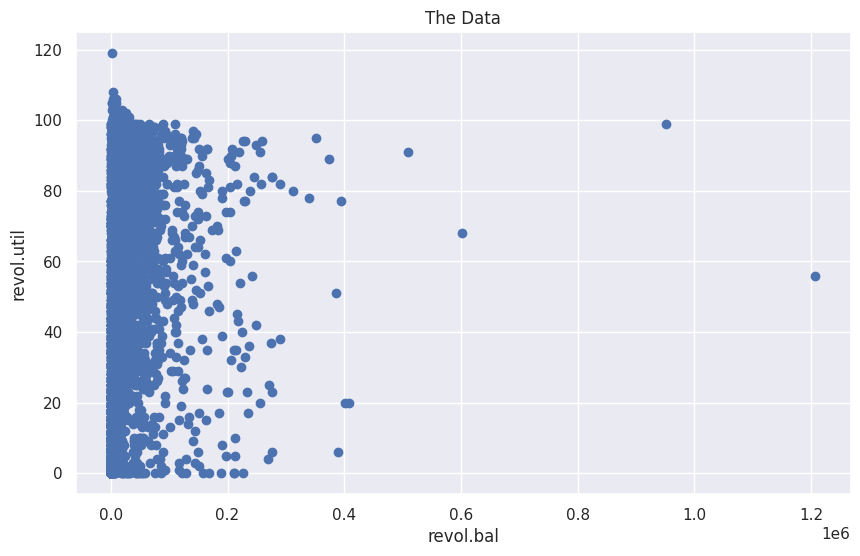

In [11]:
#plotting data
plt.figure(figsize = (10,6))
plt.scatter(df['revol.bal'],df['revol.util'])
plt.title("The Data")
plt.xlabel("revol.bal")
plt.ylabel("revol.util")

In [12]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal            float64
revol.util             int64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [13]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidian Distance')

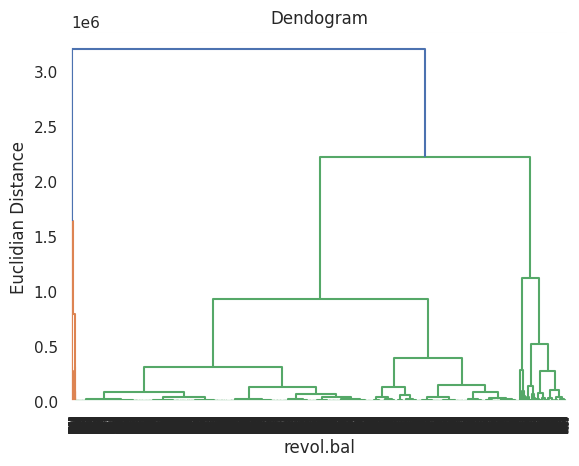

In [14]:
#Creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendogram')
plt.xlabel("revol.bal")
plt.ylabel("Euclidian Distance")

In [15]:
X,clusters = make_blobs(n_samples = 2500, centers = 4,cluster_std = 0.50,random_state=0)

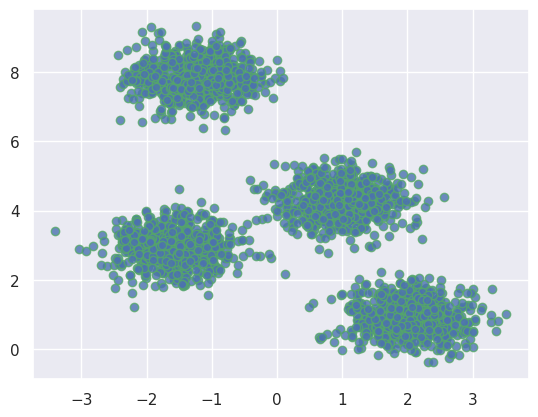

In [16]:
plt.scatter(X[:,0],X[:,1],alpha=0.8,edgecolors='g')

In [17]:
#initializing and training the model
brc = Birch(branching_factor = 50,n_clusters = 4,threshold = 1.5)
brc.fit(X)

Birch(n_clusters=4, threshold=1.5)

In [18]:
labels = brc.predict(X)
labels

array([3, 1, 2, ..., 2, 1, 0])

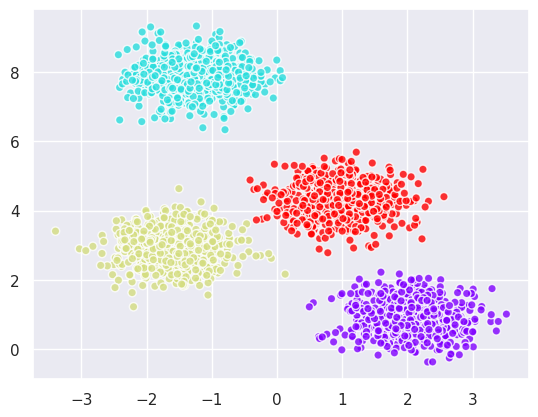

In [19]:
#plotting again but this time with a different color for each cluster
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow',alpha=0.8,edgecolors='w')